In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import model_selection
from sklearn.datasets import load_iris, make_blobs

import random

#### Задание 1.
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.
#### Задание 2
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.
#### Задание 3
Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

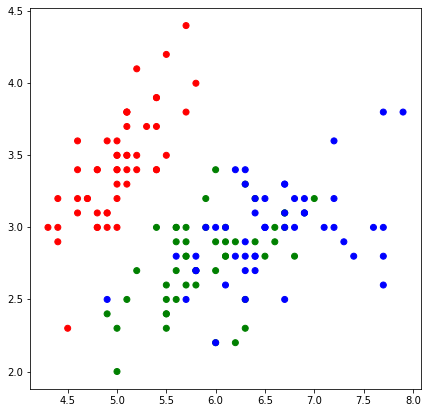

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def knn_1(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += (k + 1 - i) / k
            i += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
def get_graph(X_train, y_train, k, knn):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [9]:
k = 10

y_pred = knn_1(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

# Алгоритм knn-модели со средним значением ответа k соседей:
# Точность алгоритма при k = 1: 0.667
# Точность алгоритма при k = 2: 0.667
# Точность алгоритма при k = 3: 0.733
# Точность алгоритма при k = 4: 0.833
# Точность алгоритма при k = 5: 0.867
# Точность алгоритма при k = 6: 0.833

Точность алгоритма при k = 10: 0.867


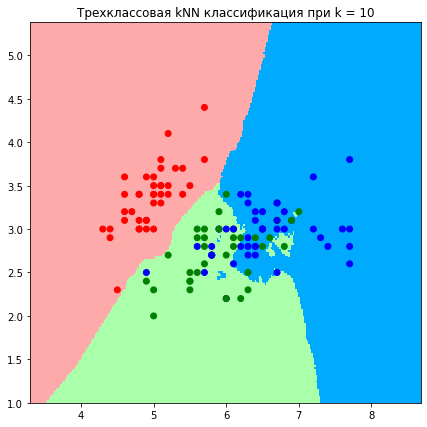

In [10]:
get_graph(X_train, y_train, k, knn_1)

#### 1. Вывод:
Оптимальное значение точности для knn-модели - 0.867.
Точность аналогичная knn-модели со средним значением ответа среди 5 соседей, при добавлении весов для соседей в зависимости от номера соседа по формуле w = (k + 1 - i) / k,  достигается при 10 <= k <= 16. Cложность разделяющей гиперплоскости выглядит оптимальной при k = 10 

In [11]:
def knn_2(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 0.75**d[0]
            i += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [12]:
k = 10

y_pred = knn_2(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.867


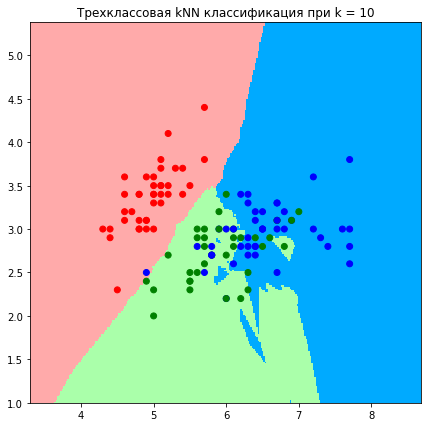

In [13]:
get_graph(X_train, y_train, k, knn=knn_2)

#### 2. Вывод:
Оптимальная точность knn-модели при добавлении весов для соседей в зависимости от расстояния до соседа по формуле w = 0.75^d, достигается при 9 <= k <= 10. При этом разделяющая гиперплоскость выглядит сложнее, чем при добавлении весов для соседей в зависимости от номера соседа.

#### Задание 4*
Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [14]:
np.random.seed(42)

class KMeans:
    def __init__(self, n_clusters=3, max_iterations=10, min_distance=1e-4):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.min_distance = min_distance
        
        
    def e_metrics(self, x1, x2):
        distance = 0
        for i in range(len(x1)):
            distance += np.square(x1[i] - x2[i])    
        return np.sqrt(distance)
    
    
    def fit(self, data):
        # инициализируем центроиды как случайные k элементов датасета
        centroids = [data[i] for i in range(self.n_clusters)]        
        
        for _ in range(self.max_iterations):
            # Создадим словарь для классификации
            classes = {i: [] for i in range(self.n_clusters)} 
            classes_ind = {i: [] for i in range(self.n_clusters)}
            # классифицируем объекты по центроидам            
            for i in range(len(data)):
                # определим расстояния от объекта до каждого центроида
                distances = [self.e_metrics(data[i], centroid) for centroid in centroids]
                
                # отнесем объект к кластеру, до центроида которого наименьшее расстояние
                classification = distances.index(min(distances))
                classes[classification].append(data[i])
                classes_ind[classification].append(i)
                
            # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
            old_centroids = centroids.copy()
            
            # пересчитаем центроиды как среднее по кластерам
            
            for classification in classes:                
                centroids[classification] = np.average(classes[classification], axis=0)
                                        
            # сравним величину смещения центроидов с минимальной
            optimal = True
            for centroid in range(len(centroids)):
                if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > self.min_distance:
                    optimal = False

            # если все смещения меньше минимального, останавливаем алгоритм  
            if optimal:
                break
                
        cluster_labels = np.zeros(data.shape[0])
        for i in range(1, self.n_clusters):            
            cluster_labels[classes_ind[i]] = i
            
        self.centroids = old_centroids
        self.clusters = classes
        self.labels_ = cluster_labels

In [15]:
def calc_mean_sq_distance(X, K):
    mean_sq_distance = []
    for n_clusters in range(1, K+1):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        centroids = kmeans.centroids
        clusters = kmeans.clusters

        sum_ = 0
        for k in range(n_clusters):
            for arr in clusters[k]:
                x, y = arr - centroids[k]
                sum_ += x**2 + y**2
        mean_sq_distance.append(round(sum_ / n_clusters, 0))
    return mean_sq_distance

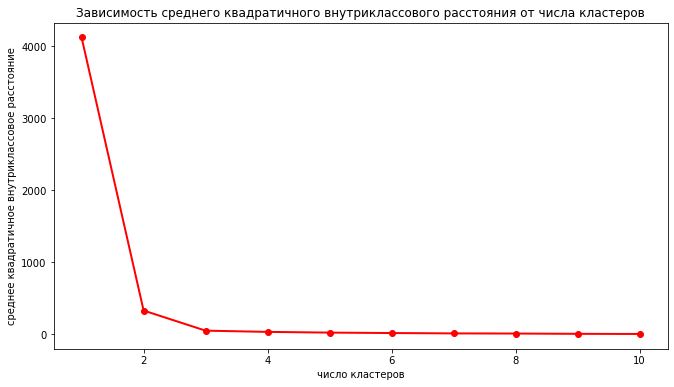

In [16]:
X, y = make_blobs(n_samples=100, random_state=1)

K = 10
mean_sq_distance = calc_mean_sq_distance(X, K)    
    
fig = plt.figure(figsize=(11, 6))
n_clusters = np.arange(1, K+1)
plt.plot(n_clusters, mean_sq_distance, 'ro-', linewidth=2)
plt.title('Зависимость среднего квадратичного внутриклассового расстояния от числа кластеров')
plt.xlabel('число кластеров')
plt.ylabel('среднее квадратичное внутриклассовое расстояние')

plt.show()